In [ ]:
#Loading Validation Data
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
#Loading the unlabelled data
df = pd.read_excel('/content/CIP_01_05_2023_to_08_06_2023_granular data main.xlsx')
df = df[['Date', 'Time', 'Consumption']]
df



,Date,Time,Consumption
0,01/05/2023,00:00:25,0.64
1,01/05/2023,00:05:23,0.72
2,01/05/2023,00:10:25,0.69
3,01/05/2023,00:15:25,0.55
4,01/05/2023,00:20:26,0.52
...,...,...,...
10867,04/06/2023,23:36:13,0.04
10868,04/06/2023,23:41:12,0.00
10869,04/06/2023,23:46:11,0.00
10870,04/06/2023,23:51:12,0.00


Basic Statistics:
Mean Consumption: 0.15888704930095676
Standard Deviation of Consumption: 0.24821918092428713
Minimum Consumption: 0.0
Maximum Consumption: 1.0499999999992724
Median Consumption: 0.0
25th Percentile of Consumption: 0.0
75th Percentile of Consumption: 0.28999999999723514


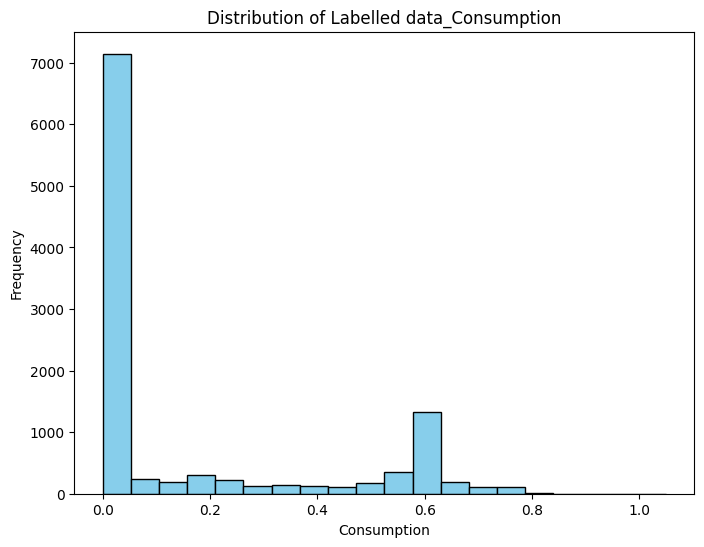

In [ ]:
#EDA
import pandas as pd
import matplotlib.pyplot as plt
# Print the basic statistics
print("Basic Statistics:")
print("Mean Consumption:", df['Consumption'].mean())
print("Standard Deviation of Consumption:", df['Consumption'].std())
print("Minimum Consumption:", df['Consumption'].min())
print("Maximum Consumption:", df['Consumption'].max())
print("Median Consumption:", df['Consumption'].median())
print("25th Percentile of Consumption:", df['Consumption'].quantile(0.25))
print("75th Percentile of Consumption:", df['Consumption'].quantile(0.75))
# Plot the distribution of Consumption
plt.figure(figsize=(8, 6))
plt.hist(df['Consumption'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Consumption')
plt.ylabel('Frequency')
plt.title('Distribution of Labelled data_Consumption')
plt.show()

In [ ]:
# Create a new column 'Status' based on the 'Consumption' values
df['Status'] = df['Consumption'].apply(lambda x: 'Anomaly' if x > 0.60 else 'Normal')

# Save the DataFrame to an Excel file
output_file_path = 'labeled_data.xlsx'  # Replace with your desired output file path
df.to_excel(output_file_path, index=False)

In [ ]:
#Loading the manually labelled data
dy = pd.read_excel('/content/labeled_data.xlsx')
dy

,Date,Time,Consumption,Status
0,01/05/2023,00:00:25,0.64,Anomaly
1,01/05/2023,00:05:23,0.72,Anomaly
2,01/05/2023,00:10:25,0.69,Anomaly
3,01/05/2023,00:15:25,0.55,Normal
4,01/05/2023,00:20:26,0.52,Normal
...,...,...,...,...
10867,04/06/2023,23:36:13,0.04,Normal
10868,04/06/2023,23:41:12,0.00,Normal
10869,04/06/2023,23:46:11,0.00,Normal
10870,04/06/2023,23:51:12,0.00,Normal


In [ ]:
# Count the occurrences of each status label
status_counts = dy['Status'].value_counts()

# Print the counts
print("Anomalies:", status_counts['Anomaly'])
print("Normal:", status_counts['Normal'])

Anomalies: 1346
Normal: 9526


# **KNN WITH ACTUAL & PREDICTED STATUS** (MAIN CODE)

K-Nearest Neighbors (KNN) Test Results
Precision on Test Data: 0.74
Recall on Test Data: 0.86
F1 Score on Test Data: 0.79
Accuracy on Test Data: 0.94


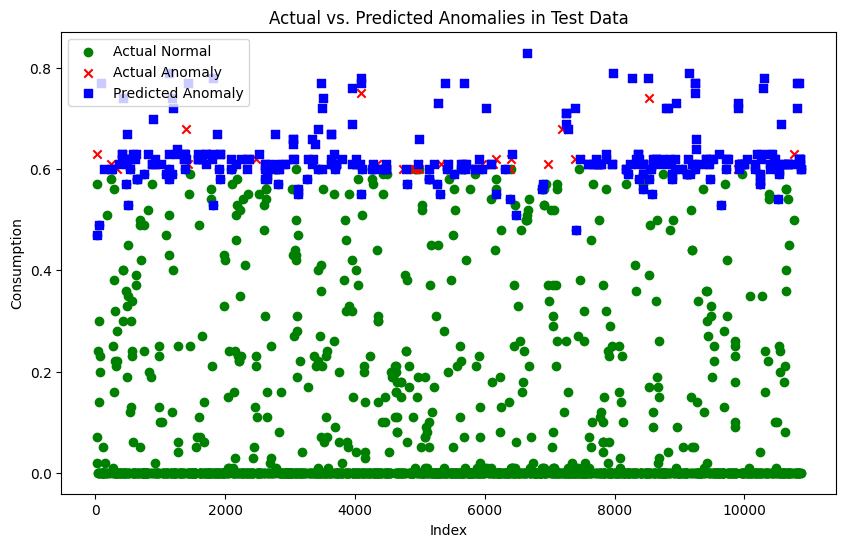

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Date' and 'Time' columns to numerical format for labeled data
dy['Date'] = pd.to_datetime(dy['Date']).astype(np.int64) // 10**9
dy['Time'] = pd.to_timedelta(dy['Time']).dt.total_seconds()

# Create lag features for labeled data
lag_range = range(1, 6)
for lag in lag_range:
    dy[f'Consumption_lag_{lag}'] = dy['Consumption'].shift(lag)

# Drop rows with missing values
dy = dy.dropna()

# Split data into train and test sets
X = dy.drop(columns=['Status'])
y = dy['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=12)

# Fit KNN model on training data
knn_model.fit(X_train, y_train)

# Predict anomalies on the test data
y_pred_test = knn_model.predict(X_test)

# Create a DataFrame with the original data and both predicted and actual status
test_data_with_predictions = X_test.copy()
test_data_with_predictions['Actual_Status'] = y_test
test_data_with_predictions['Predicted_Status'] = y_pred_test

# Calculate precision, recall, F1 score, and accuracy on the test data
precision_test = precision_score(y_test, y_pred_test, pos_label='Anomaly')
recall_test = recall_score(y_test, y_pred_test, pos_label='Anomaly')
f1_test = f1_score(y_test, y_pred_test, pos_label='Anomaly')
accuracy_test = accuracy_score(y_test, y_pred_test)

# Print precision, recall, F1 score, and accuracy
print("K-Nearest Neighbors (KNN) Test Results")
print(f"Precision on Test Data: {precision_test:.2f}")
print(f"Recall on Test Data: {recall_test:.2f}")
print(f"F1 Score on Test Data: {f1_test:.2f}")
print(f"Accuracy on Test Data: {accuracy_test:.2f}")
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already created the 'test_data_with_predictions' DataFrame as in the previous code

# Create a scatter plot to visualize the data with predicted and actual status
plt.figure(figsize=(10, 6))

# Plot points with actual status 'Normal'
plt.scatter(test_data_with_predictions.index[y_test == 'Normal'],
            test_data_with_predictions['Consumption'][y_test == 'Normal'],
            c='green', label='Actual Normal')

# Plot points with actual status 'Anomaly'
plt.scatter(test_data_with_predictions.index[y_test == 'Anomaly'],
            test_data_with_predictions['Consumption'][y_test == 'Anomaly'],
            c='red', label='Actual Anomaly', marker='x')

# Plot points with predicted status 'Anomaly'
plt.scatter(test_data_with_predictions.index[y_pred_test == 'Anomaly'],
            test_data_with_predictions['Consumption'][y_pred_test == 'Anomaly'],
            c='blue', label='Predicted Anomaly', marker='s')

plt.xlabel('Index')
plt.ylabel('Consumption')
plt.title('Actual vs. Predicted Anomalies in Test Data')
plt.legend()
plt.show()
# Convert predicted labels to string format
y_pred_test_str = np.where(y_pred_test == 0, 'Normal', 'Anomaly')


In [ ]:
import pandas as pd

# Assuming you have already created the 'test_data_with_predictions' DataFrame as in the previous code

# Define the path where you want to save the Excel file
excel_file_path = 'output_with_predictions.xlsx'

# Create a new DataFrame with predicted and actual status
output_data = test_data_with_predictions[['Actual_Status', 'Predicted_Status']]

# Save the data to an Excel file
output_data.to_excel(excel_file_path, index=False)

# Print a message indicating where the Excel file is saved
print(f"Test Data with Predicted and Actual Status saved to '{excel_file_path}'")


Test Data with Predicted and Actual Status saved to 'output_with_predictions.xlsx'


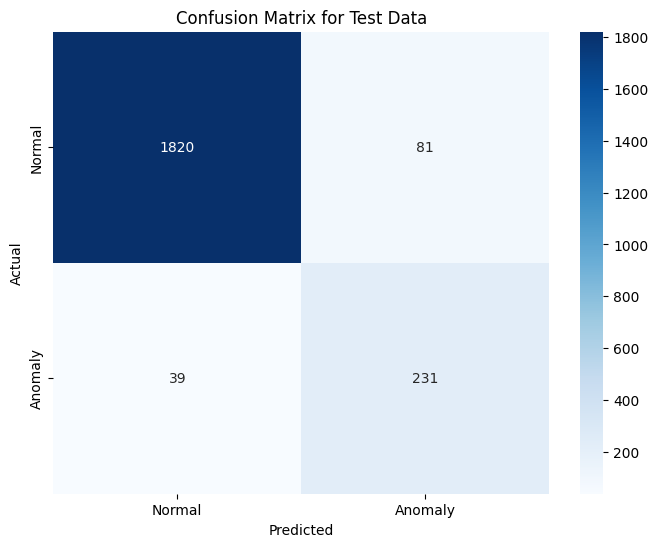

Test Data with Actual and Predicted Status (First 50 rows):
      Date  Time  Consumption  Consumption_lag_1  Consumption_lag_2  \
1691     0   0.0         0.00               0.00               0.00   
6089     0   0.0         0.54               0.10               0.00   
3796     0   0.0         0.00               0.00               0.00   
693      0   0.0         0.50               0.31               0.26   
3854     0   0.0         0.50               0.00               0.00   
...    ...   ...          ...                ...                ...   
2467     0   0.0         0.13               0.12               0.53   
413      0   0.0         0.62               0.61               0.61   
9956     0   0.0         0.61               0.61               0.60   
4448     0   0.0         0.00               0.00               0.00   
5050     0   0.0         0.00               0.00               0.00   

      Consumption_lag_3  Consumption_lag_4  Consumption_lag_5 Actual_Status  \
1691    

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix for the test data
conf_matrix_test = confusion_matrix(y_test, y_pred_test, labels=['Normal', 'Anomaly'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Test Data')
plt.show()
# Calculate probabilities on the test data
y_prob_test = knn_model.predict_proba(X_test)[:, 1]  # Probability of being an anomaly

# Print the data with actual and predicted status for the first 50 rows
print("Test Data with Actual and Predicted Status (First 50 rows):")
print(test_data_with_predictions)


# **KNN WITH VALIDATION SPLIT**

K-Nearest Neighbors (KNN) Test Results:
Precision on Test Data: 0.76
Recall on Test Data: 0.95
K-Nearest Neighbors (KNN) Validation Results:
Precision on Validation Data: 0.73
Recall on Validation Data: 0.92
F1 Score on Validation Data: 0.82
Accuracy on Validation Data: 0.95


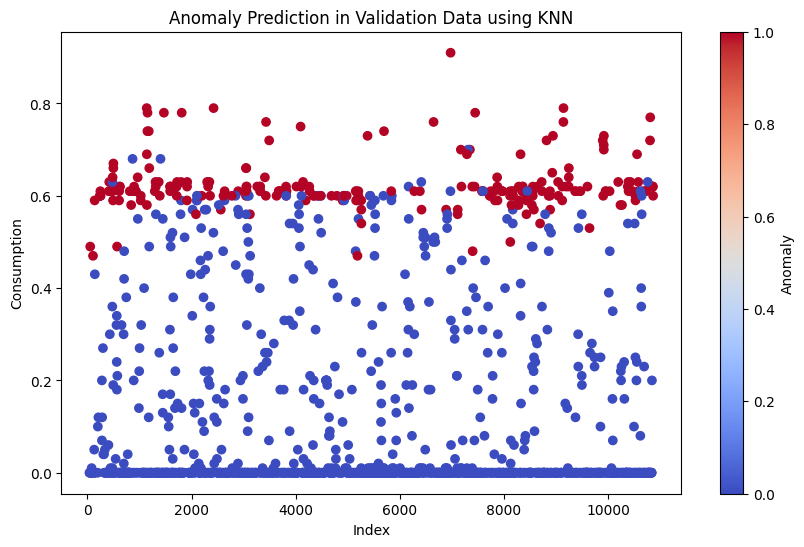

Confusion Matrix on Validation Data:
[[1367   65]
 [  15  179]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Convert 'Date' and 'Time' columns to numerical format for labeled data
dy['Date'] = pd.to_datetime(dy['Date']).astype(np.int64) // 10**9
dy['Time'] = pd.to_timedelta(dy['Time']).dt.total_seconds()

# Create lag features for labeled data
lag_range = range(1, 6)
for lag in lag_range:
    dy[f'Consumption_lag_{lag}'] = dy['Consumption'].shift(lag)

# Drop rows with missing values
dy = dy.dropna()

# Split data into train, validation, and test sets
X = dy.drop(columns=['Status'])
y = dy['Status']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=12)

# Fit KNN model on training data
knn_model.fit(X_train, y_train)

# Predict anomalies on the test data
y_pred_test = knn_model.predict(X_test)

# Calculate precision and recall on the test data
precision_test = precision_score(y_test, y_pred_test, pos_label='Anomaly')
recall_test = recall_score(y_test, y_pred_test, pos_label='Anomaly')

print("K-Nearest Neighbors (KNN) Test Results:")
print(f"Precision on Test Data: {precision_test:.2f}")
print(f"Recall on Test Data: {recall_test:.2f}")

# Predict anomalies on the validation data
y_pred_validation = knn_model.predict(X_validation)

# Calculate precision, recall, F1 score, and accuracy on the validation data
precision_validation = precision_score(y_validation, y_pred_validation, pos_label='Anomaly')
recall_validation = recall_score(y_validation, y_pred_validation, pos_label='Anomaly')
f1_validation = f1_score(y_validation, y_pred_validation, pos_label='Anomaly')
accuracy_validation = accuracy_score(y_validation, y_pred_validation)

print("K-Nearest Neighbors (KNN) Validation Results:")
print(f"Precision on Validation Data: {precision_validation:.2f}")
print(f"Recall on Validation Data: {recall_validation:.2f}")
print(f"F1 Score on Validation Data: {f1_validation:.2f}")
print(f"Accuracy on Validation Data: {accuracy_validation:.2f}")

# Plot anomalies in validation data
plt.figure(figsize=(10, 6))
plt.scatter(X_validation.index, X_validation['Consumption'], c=y_pred_validation == 'Anomaly', cmap='coolwarm')
plt.xlabel('Index')
plt.ylabel('Consumption')
plt.title('Anomaly Prediction in Validation Data using KNN')
plt.colorbar().set_label('Anomaly')
plt.show()

# Calculate the confusion matrix for the validation data
conf_matrix_validation = confusion_matrix(y_validation, y_pred_validation, labels=['Normal', 'Anomaly'])

# Print the confusion matrix for validation data
print("Confusion Matrix on Validation Data:")
print(conf_matrix_validation)


In [ ]:
validation_data_with_predictions = X_validation.copy()
validation_data_with_predictions['Actual_Status'] = y_validation
validation_data_with_predictions['Predicted_Status'] = y_pred_validation

# Replace binary labels with "Normal" and "Anomaly"
validation_data_with_predictions['Actual_Status'] = np.where(validation_data_with_predictions['Actual_Status'] == 'Normal', 'Normal', 'Anomaly')
validation_data_with_predictions['Predicted_Status'] = np.where(validation_data_with_predictions['Predicted_Status'] == 'Normal', 'Normal', 'Anomaly')

# Print the data with actual and predicted labels
print("Validation Data with Actual and Predicted Labels:")
print(validation_data_with_predictions)


Validation Data with Actual and Predicted Labels:
      Date  Time  Consumption  Consumption_lag_1  Consumption_lag_2  \
1666     0   0.0         0.00               0.00               0.00   
6215     0   0.0         0.00               0.00               0.00   
6689     0   0.0         0.00               0.00               0.00   
9408     0   0.0         0.62               0.61               0.60   
4609     0   0.0         0.20               0.20               0.20   
...    ...   ...          ...                ...                ...   
7368     0   0.0         0.71               0.00               0.48   
7008     0   0.0         0.00               0.00               0.00   
4674     0   0.0         0.00               0.00               0.00   
5459     0   0.0         0.00               0.00               0.00   
5292     0   0.0         0.00               0.00               0.00   

      Consumption_lag_3  Consumption_lag_4  Consumption_lag_5 Actual_Status  \
1666              

In [ ]:
# Print the path where the data was saved
excel_file_path = 'validation_data_with_predictions.xlsx'
validation_data_with_predictions.to_excel(excel_file_path, index=False)
print(f"Validation Data with Predicted Labels saved to '{excel_file_path}'")


Validation Data with Predicted Labels saved to 'validation_data_with_predictions.xlsx'


# **ISOLATION FOREST**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest Test Results:
Precision on Test Data: 0.30
Recall on Test Data: 0.14


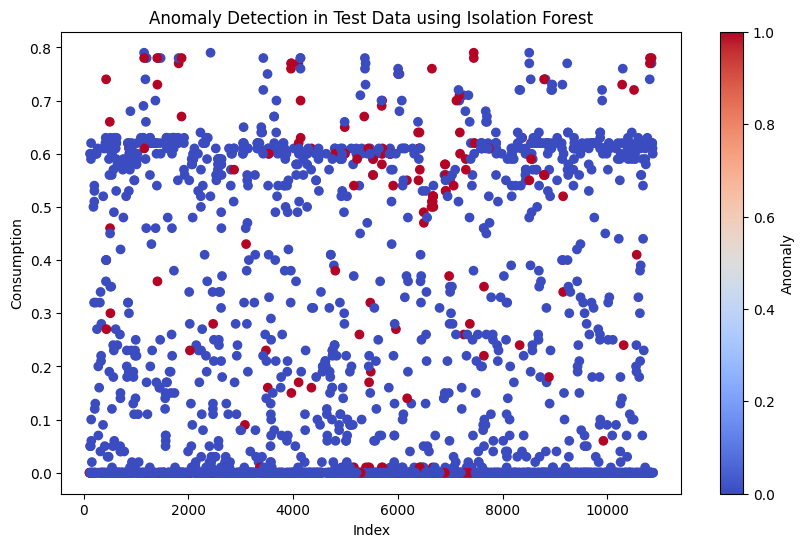

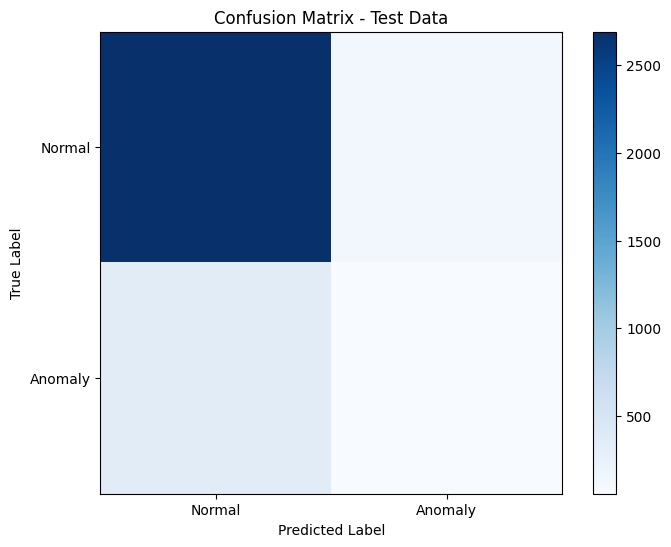

Isolation Forest Test Results:
F1 Score on Test Data: 0.19
Accuracy on Test Data: 0.85


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Convert 'Date' and 'Time' columns to numerical format for labeled data
dy['Date'] = pd.to_datetime(dy['Date']).astype(np.int64) // 10**9
dy['Time'] = pd.to_timedelta(dy['Time']).dt.total_seconds()

# Create lag features for labeled data
lag_range = range(1, 8)
for lag in lag_range:
    dy[f'Consumption_lag_{lag}'] = dy['Consumption'].shift(lag)

# Drop rows with missing values
dy = dy.dropna()

# Split data into train and test sets
X = dy.drop(columns=['Status'])
y = dy['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Isolation Forest model
isolation_forest_model = IsolationForest(contamination=0.06, random_state=42)

# Fit Isolation Forest model on training data
isolation_forest_model.fit(X_train)

# Predict anomalies on the test data
y_pred_test = isolation_forest_model.predict(X_test)

# Map Isolation Forest labels to match your true labels
y_pred_test_mapped = ['Anomaly' if label == -1 else 'Normal' for label in y_pred_test]

# Calculate precision and recall on the test data
precision_test = precision_score(y_test, y_pred_test_mapped, pos_label='Anomaly')
recall_test = recall_score(y_test, y_pred_test_mapped, pos_label='Anomaly')

print("Isolation Forest Test Results:")
print(f"Precision on Test Data: {precision_test:.2f}")
print(f"Recall on Test Data: {recall_test:.2f}")

# Visualize anomalies on the test data
y_pred_validation = isolation_forest_model.predict(X_test)  # Use test data for visualization

# Convert the predicted labels to boolean values
y_pred_validation_bool = (y_pred_validation == -1)

# Plot anomalies in the test data
plt.figure(figsize=(10, 6))
plt.scatter(X_test.index, X_test['Consumption'], c=y_pred_validation_bool, cmap='coolwarm')
plt.xlabel('Index')
plt.ylabel('Consumption')
plt.title('Anomaly Detection in Test Data using Isolation Forest')
plt.colorbar().set_label('Anomaly')
plt.show()

# Calculate confusion matrix for test data
conf_matrix_test = confusion_matrix(y_test, y_pred_test_mapped, labels=['Normal', 'Anomaly'])

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_test, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Test Data')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Normal', 'Anomaly'])
plt.yticks(tick_marks, ['Normal', 'Anomaly'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import seaborn as sns

# Get anomaly scores for the test data
y_pred_test_scores = isolation_forest_model.decision_function(X_test)

from sklearn.metrics import f1_score, accuracy_score

# Calculate F1 score on the test data
f1_test = f1_score(y_test, y_pred_test_mapped, pos_label='Anomaly')

# Calculate accuracy on the test data
accuracy_test = accuracy_score(y_test, y_pred_test_mapped)

print("Isolation Forest Test Results:")
print(f"F1 Score on Test Data: {f1_test:.2f}")
print(f"Accuracy on Test Data: {accuracy_test:.2f}")


# **SVM**

Test Results:
Precision: 0.50
Recall: 0.41
F1 Score: 0.45
Accuracy: 0.87


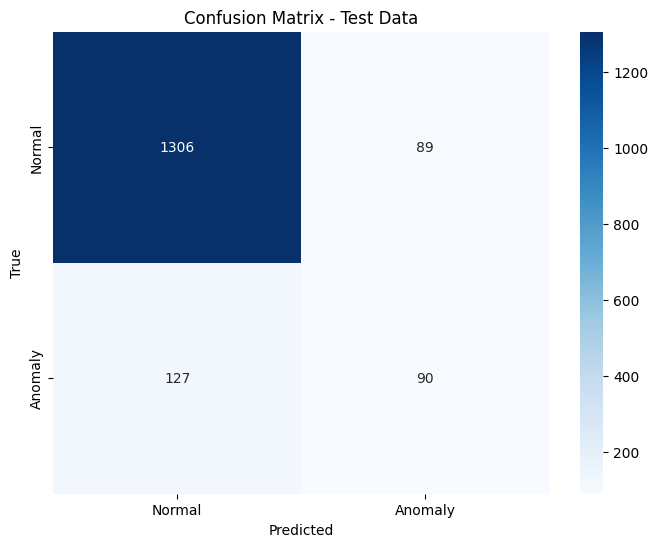

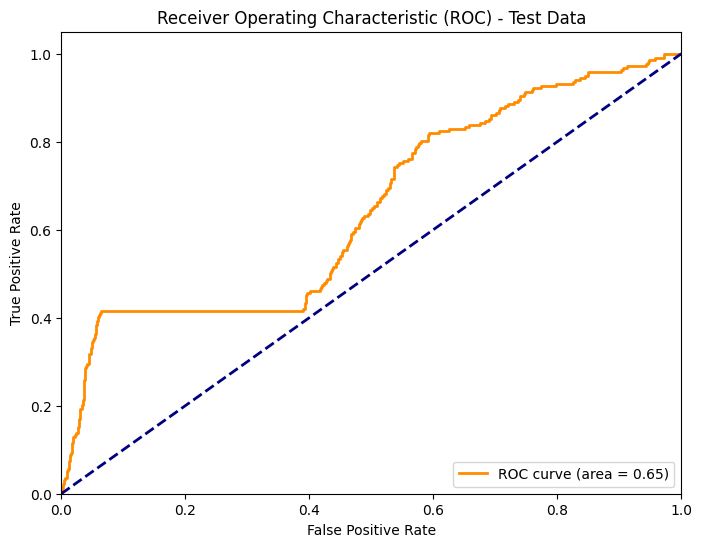

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
import seaborn as sns

# Load your dataset as dy (assuming it's already loaded)

# Convert 'Date' and 'Time' columns to numerical format for labeled data
dy['Date'] = pd.to_datetime(dy['Date']).astype(np.int64) // 10**9
dy['Time'] = pd.to_timedelta(dy['Time']).dt.total_seconds()

# Create lag features for labeled data
lag_range = range(1, 6)
for lag in lag_range:
    dy[f'Consumption_lag_{lag}'] = dy['Consumption'].shift(lag)

# Drop rows with missing values
dy = dy.dropna()

# Split data into train, validation, and test sets
X = dy.drop(columns=['Status'])
y = dy['Status']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize One-Class SVM model
svm_model = OneClassSVM(nu=0.16, kernel="rbf", gamma=0.1)

# Fit One-Class SVM model on training data
svm_model.fit(X_train)

# Predict anomalies on the test data
y_pred_test = svm_model.predict(X_test)

# Convert the predicted labels to boolean values
y_pred_test_bool = (y_pred_test == -1)

# Calculate precision, recall, F1 score, and accuracy on the test data
precision_test = precision_score(y_test == 'Anomaly', y_pred_test_bool)
recall_test = recall_score(y_test == 'Anomaly', y_pred_test_bool)
f1_test = f1_score(y_test == 'Anomaly', y_pred_test_bool)
accuracy_test = accuracy_score(y_test == 'Anomaly', y_pred_test_bool)

print("Test Results:")
print(f"Precision: {precision_test:.2f}")
print(f"Recall: {recall_test:.2f}")
print(f"F1 Score: {f1_test:.2f}")
print(f"Accuracy: {accuracy_test:.2f}")

# Calculate confusion matrix for test data
conf_matrix_test = confusion_matrix(y_test == 'Anomaly', y_pred_test_bool)

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Test Data')
plt.show()

# Get anomaly scores for the test data
y_pred_test_scores = svm_model.decision_function(X_test)

# Calculate ROC curve for test data
fpr_test, tpr_test, _ = roc_curve(y_test == 'Anomaly', -y_pred_test_scores)  # Note the negative sign here
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve for test data
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Test Data')
plt.legend(loc="lower right")
plt.show()


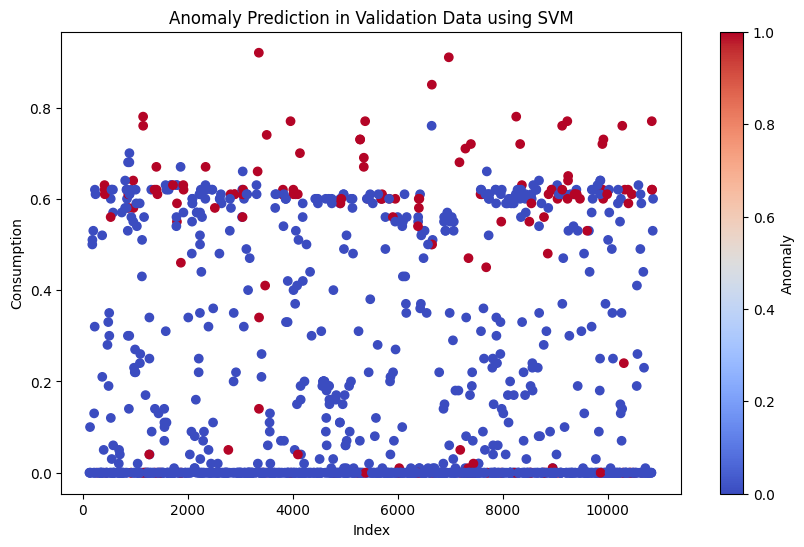

Validation Results:
Precision: 0.44
Recall: 0.44
F1 Score: 0.44
Accuracy: 0.87


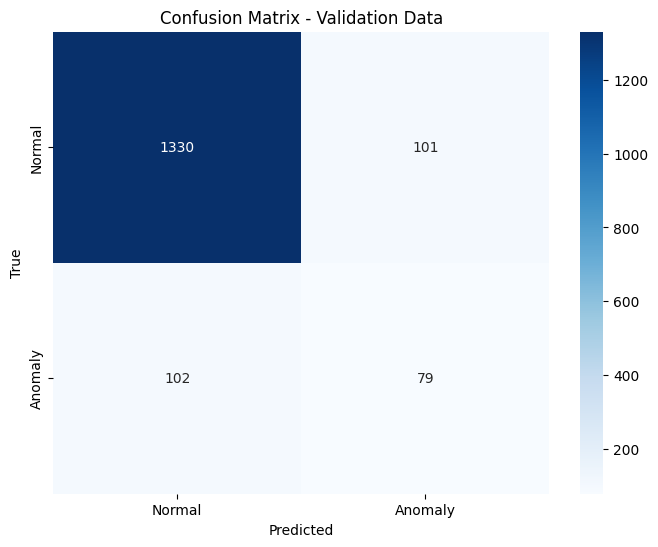

In [ ]:
# Predict anomalies on the validation data
y_pred_validation = svm_model.predict(X_validation)

# Convert the predicted labels to boolean values
y_pred_validation_bool = (y_pred_validation == -1)

# Plot anomalies in the validation data
plt.figure(figsize=(10, 6))
plt.scatter(X_validation.index, X_validation['Consumption'], c=y_pred_validation_bool, cmap='coolwarm')
plt.xlabel('Index')
plt.ylabel('Consumption')
plt.title('Anomaly Prediction in Validation Data using SVM')
plt.colorbar().set_label('Anomaly')
plt.show()

# Calculate precision, recall, F1 score, and accuracy on the validation data
precision_validation = precision_score(y_validation == 'Anomaly', y_pred_validation_bool)
recall_validation = recall_score(y_validation == 'Anomaly', y_pred_validation_bool)
f1_validation = f1_score(y_validation == 'Anomaly', y_pred_validation_bool)
accuracy_validation = accuracy_score(y_validation == 'Anomaly', y_pred_validation_bool)

print("Validation Results:")
print(f"Precision: {precision_validation:.2f}")
print(f"Recall: {recall_validation:.2f}")
print(f"F1 Score: {f1_validation:.2f}")
print(f"Accuracy: {accuracy_validation:.2f}")

# Calculate confusion matrix for validation data
conf_matrix_validation = confusion_matrix(y_validation == 'Anomaly', y_pred_validation_bool)

# Plot confusion matrix for validation data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_validation, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Validation Data')
plt.show()


# **GMM**

Validation Results:
Precision: 0.33
Recall: 0.02
F1 Score: 0.04
Accuracy: 0.88


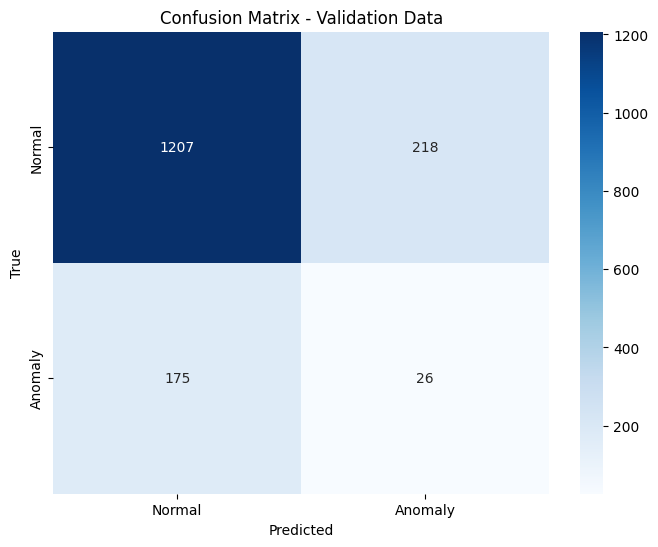

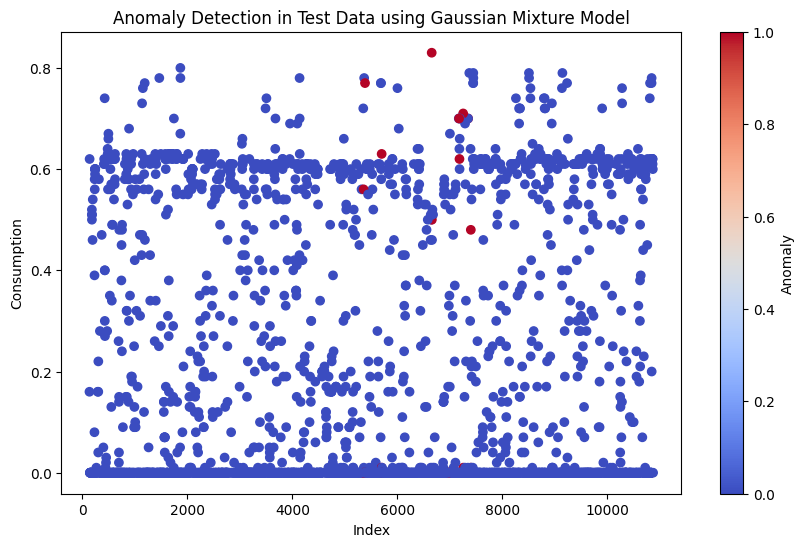

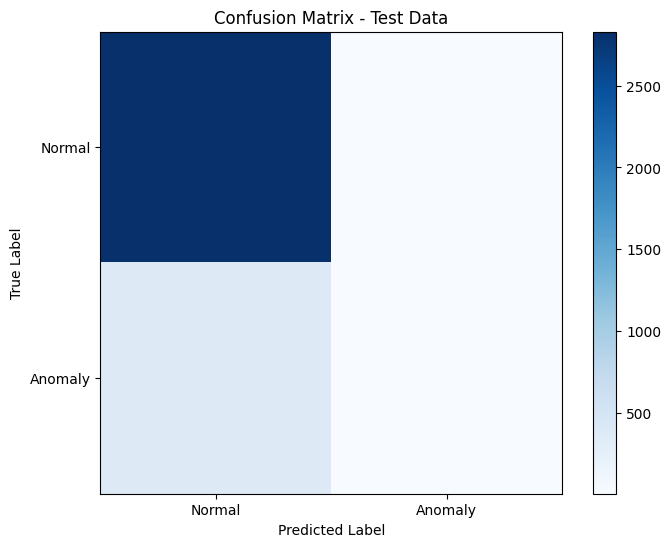

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split

# Convert 'Date' and 'Time' columns to numerical format for labeled data
dy['Date'] = pd.to_datetime(dy['Date']).astype(np.int64) // 10**9
dy['Time'] = pd.to_timedelta(dy['Time']).dt.total_seconds()

# Create lag features for labeled data
lag_range = range(1, 8)
for lag in lag_range:
    dy[f'Consumption_lag_{lag}'] = dy['Consumption'].shift(lag)

# Drop rows with missing values
dy = dy.dropna()

# Split data into train and test sets
X = dy.drop(columns=['Status'])
y = dy['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Gaussian Mixture Model
n_components = 2  # You can adjust the number of components
gmm = GaussianMixture(n_components=n_components, random_state=42)

# Fit GMM on training data
gmm.fit(X_train)

# Predict anomalies on the test data using a threshold
threshold = 0.5  # You can adjust this threshold
y_pred_test_proba = gmm.score_samples(X_test)
y_pred_test = (y_pred_test_proba < threshold).astype(int)

# Map GMM labels to match your true labels
y_pred_test_mapped = ['Anomaly' if label == 1 else 'Normal' for label in y_pred_test]

# Calculate precision, recall, F1 score, and accuracy on the validation data
precision_validation = precision_score(y_test, y_pred_test_mapped, pos_label='Anomaly')
recall_validation = recall_score(y_test, y_pred_test_mapped, pos_label='Anomaly')
f1_validation = f1_score(y_test, y_pred_test_mapped, pos_label='Anomaly')
accuracy_validation = accuracy_score(y_test, y_pred_test_mapped)

print("Validation Results:")
print(f"Precision: {precision_validation:.2f}")
print(f"Recall: {recall_validation:.2f}")
print(f"F1 Score: {f1_validation:.2f}")
print(f"Accuracy: {accuracy_validation:.2f}")

# Plot confusion matrix for validation data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_validation, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Validation Data')
plt.show()
# Visualize anomalies on the test data
y_pred_validation_proba = gmm.score_samples(X_test)  # Use test data for visualization
y_pred_validation = (y_pred_validation_proba < threshold).astype(int)

# Convert the predicted labels to boolean values
y_pred_validation_bool = (y_pred_validation == 1)

# Plot anomalies in the test data
plt.figure(figsize=(10, 6))
plt.scatter(X_test.index, X_test['Consumption'], c=y_pred_validation_bool, cmap='coolwarm')
plt.xlabel('Index')
plt.ylabel('Consumption')
plt.title('Anomaly Detection in Test Data using Gaussian Mixture Model')
plt.colorbar().set_label('Anomaly')
plt.show()

# Calculate confusion matrix for test data
conf_matrix_test = confusion_matrix(y_test, y_pred_test_mapped, labels=['Normal', 'Anomaly'])

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_test, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Test Data')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Normal', 'Anomaly'])
plt.yticks(tick_marks, ['Normal', 'Anomaly'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
